In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

In [3]:
def sep( n: int = 80, sep: str = "="):
    print(sep*n)

def new_section(string: str, n: int = 80, sep: str = "="):
    m = len(string)
    if n < m:
        n = m + 6
    padding = (n-m+1)//2
    print(sep*padding + " " + string + " " + sep*padding)


# Data

O CQI (Coffee Quality Institute) mantém um banco de dados na web que serve como recurso para profissionais do café e entusiastas interessados em aprender sobre a qualidade do café e sustentabilidade. O banco de dados inclui uma variedade de informações sobre produção, processamento e avaliação sensorial do café. Ele também contém dados sobre genética do café, tipos de solo e outros fatores que podem afetar a qualidade do café.

https://www.kaggle.com/datasets/adampq/coffee-quality-with-locations-of-origin/data

https://database.coffeeinstitute.org/


# Campos
**REC_ID**: Refere-se ao ID único do banco de dados.

**Species**: Refere-se à espécie botânica dos grãos de café, como Arábica ou Robusta.

**Continent.of.Origin**: Refere-se ao continente de origem para o respectivo lote de café.

**Country.of.Origin**: Refere-se ao país de origem para o respectivo lote de café.

**Harvest.Year**: Refere-se ao ano de colheita para o respectivo lote de café.

**Expiration**: Refere-se à data de validade atribuída para o respectivo lote de café.

**Variety**: Refere-se ao cultivar específico ou tipo de planta de café da qual os grãos são colhidos.

**Color**: Refere-se à cor observada do grão de café cru. Tipicamente azul, verde ou misturado.

**Processing.Method**: Descreve o método utilizado para processar os grãos de café após a colheita.

**Aroma**: Refere-se ao cheiro ou fragrância do café.

**Flavor**: Avaliado com base no sabor, incluindo qualquer doçura, amargor, acidez e outras notas de sabor.

**Aftertaste**: Refere-se ao sabor persistente que permanece na boca após engolir o café.

**Acidity**: Refere-se à vivacidade ou brilho do sabor.

**Body**: Refere-se à espessura ou viscosidade do café na boca.

**Balance**: Refere-se a quão bem os diferentes componentes do sabor do café trabalham juntos.

**Uniformity**: Refere-se à consistência do café de xícara para xícara.

**Clean.Cup**: Refere-se a um café que está livre de quaisquer sabores estranhos ou defeitos, como azedume, mofo ou velhice.

**Sweetness**: Refere-se à paleta de doçura oferecida pelo seu sabor.

**Moisture**: Representa o teor de umidade dos grãos de café, normalmente medido como uma porcentagem.

**Quakers**: Indica a presença de grãos quakers, que são grãos imaturos ou defeituosos que não torram adequadamente.

**Category.One.Defects**: Refere-se ao número total de defeitos de primeiro nível, como grãos pretos ou azedos.

**Category.Two.Defects**: Refere-se ao número total de defeitos de segundo nível, incluindo defeitos mais graves como grãos mofados, danificados por insetos ou perfurados.

**Rec_Cnt** (Agrupado por conjuntos de dados apenas): Refere-se à contagem total de registros para cada um dos respectivos recipientes de localização.

In [56]:
coffee_quality = pd.read_csv("data\Coffee_Qlty.csv")
coffee_quality_copy = pd.read_csv("data\Coffee_Qlty_copy.csv")
coffee_quality_country = pd.read_csv("data\Coffee_Qlty_By_Country.csv")
coffee_quality_country_arabica_copy = pd.read_csv("data\Coffee_Qlty_By_Country_Arabica_Copy.csv")
coffee_quality_country_robusta_copy = pd.read_csv("data\Coffee_Qlty_By_Country_Robusta_Copy.csv")
coffee_quality_country_copy = pd.read_csv("data\Coffee_Qlty_By_Country_Copy.csv")
coffee_quality_continent = pd.read_csv("data\Coffee_Qlty_By_Continent.csv")
coffee_distribution = pd.read_csv("data\psd_coffee.csv")
coffee_brasil_distribution_2023 = pd.read_csv("data\CECAFE-Exportacao2023_PaisDestino.csv")
coffee_brasil_distribution_2023 = coffee_brasil_distribution_2023.drop(coffee_brasil_distribution_2023.columns[-1], axis=1)


In [47]:
coffee_quality.columns



Index(['REC_ID', 'Species', 'Continent.of.Origin', 'Country.of.Origin',
       'Harvest.Year', 'Expiration', 'Variety', 'Color', 'Processing.Method',
       'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
       'Uniformity', 'Clean.Cup', 'Sweetness', 'Moisture', 'Quakers',
       'Category.One.Defects', 'Category.Two.Defects', 'id'],
      dtype='object')

In [52]:
# Supondo que 'df' é o seu DataFrame original
# Calcular as médias das características relevantes agrupadas por 'Country.of.Origin'
aggregated_df = coffee_quality.groupby('Country.of.Origin').agg({
    'Aroma': 'mean',
    'Flavor': 'mean',
    'Aftertaste': 'mean',
    'Acidity': 'mean',
    'Body': 'mean',
    'Balance': 'mean',
    'Uniformity': 'mean',
    'Clean.Cup': 'mean',
    'Sweetness': 'mean',
    'Moisture': 'mean',
    'Quakers': 'mean',
    'Category.One.Defects': 'mean',
    'Category.Two.Defects': 'mean',
    'id': 'first'  # Supondo que cada país tem um único código alpha_3 correspondente
}).reset_index()

# Renomear as colunas para refletir que são médias
aggregated_df.columns = [
    'Country_of_Origin',
    'AVG_Aroma',
    'AVG_Flavor',
    'AVG_Aftertaste',
    'AVG_Acidity',
    'AVG_Body',
    'AVG_Balance',
    'AVG_Uniformity',
    'AVG_Clean.Cup',
    'AVG_Sweetness',
    'AVG_Moisture',
    'AVG_Quakers',
    'AVG_Category.One.Defects',
    'AVG_Category.Two.Defects',
    'id'
]

# Adicionando uma coluna para contar os registros por país
aggregated_df['Rec_Cnt'] = coffee_quality.groupby('Country.of.Origin')['REC_ID'].transform('count')

aggregated_df.to_csv("data\Coffee_Qlty_By_Country_copy.csv", index=False)

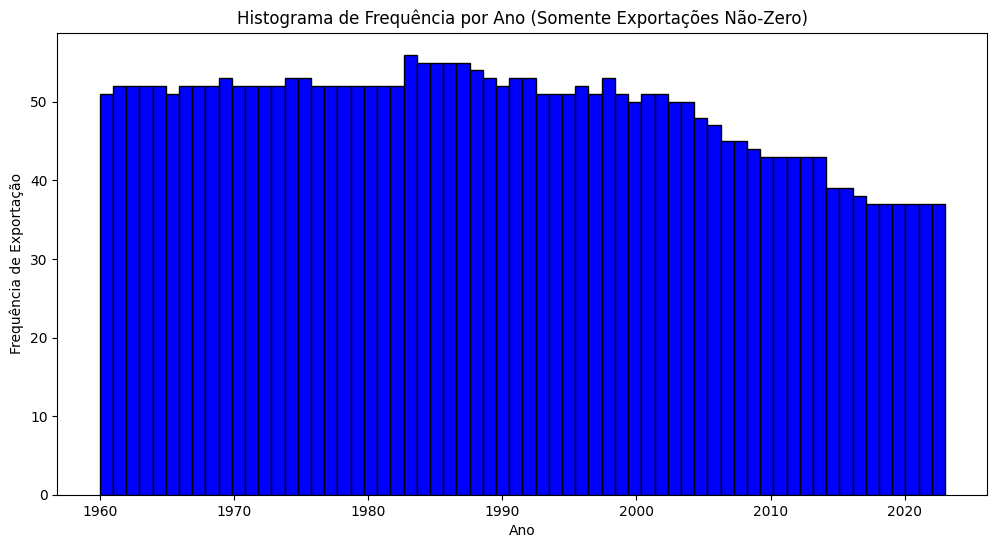

In [6]:
coffee_distribution_non_zero = coffee_distribution[coffee_distribution["Bean Exports"] != 0].copy()

coffee_distribution_non_zero["Year"] = coffee_distribution_non_zero["Year"].astype(int)

plt.figure(figsize=(12, 6))
plt.hist(coffee_distribution_non_zero["Year"], bins=len(coffee_distribution_non_zero["Year"].unique()), color="blue", edgecolor="black")
plt.title("Histograma de Frequência por Ano (Somente Exportações Não-Zero)")
plt.xlabel("Ano")
plt.ylabel("Frequência de Exportação")
plt.show()

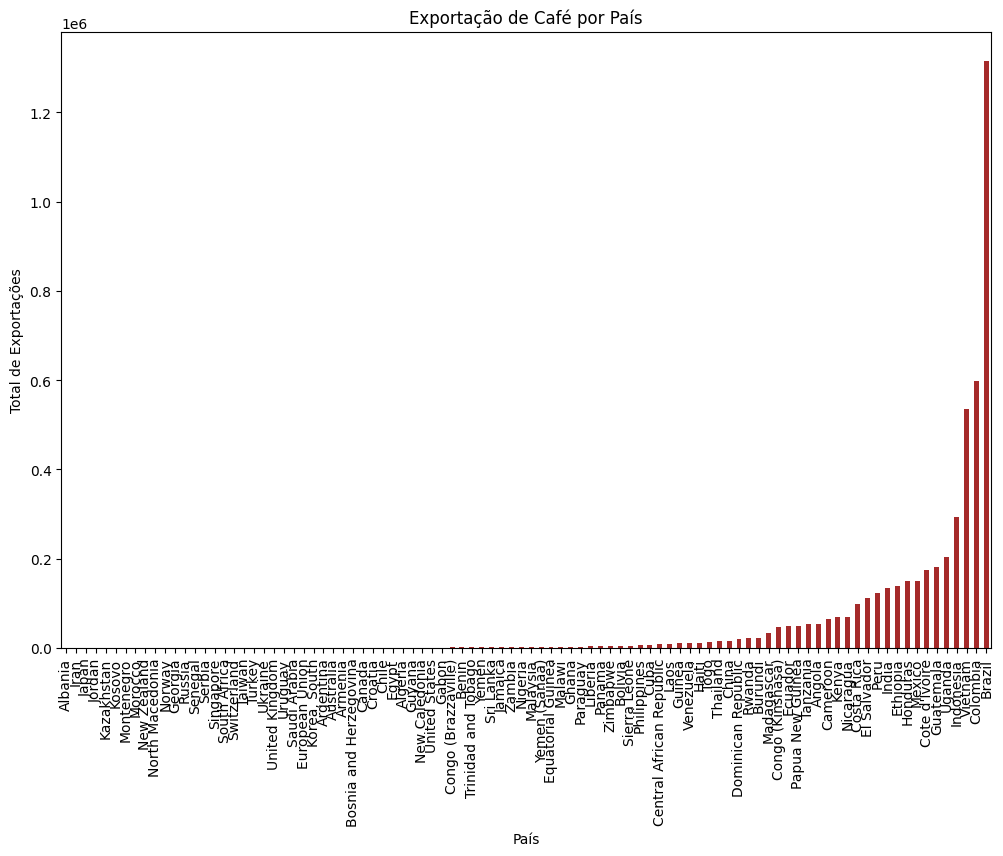

In [7]:
exports_per_country = coffee_distribution.groupby("Country")["Bean Exports"].sum().dropna()

plt.figure(figsize=(12, 8))
exports_per_country.sort_values().plot(kind="bar", color="brown") 
plt.title("Exportação de Café por País")
plt.xlabel("País")
plt.ylabel("Total de Exportações")
plt.xticks(rotation=90)
plt.show()

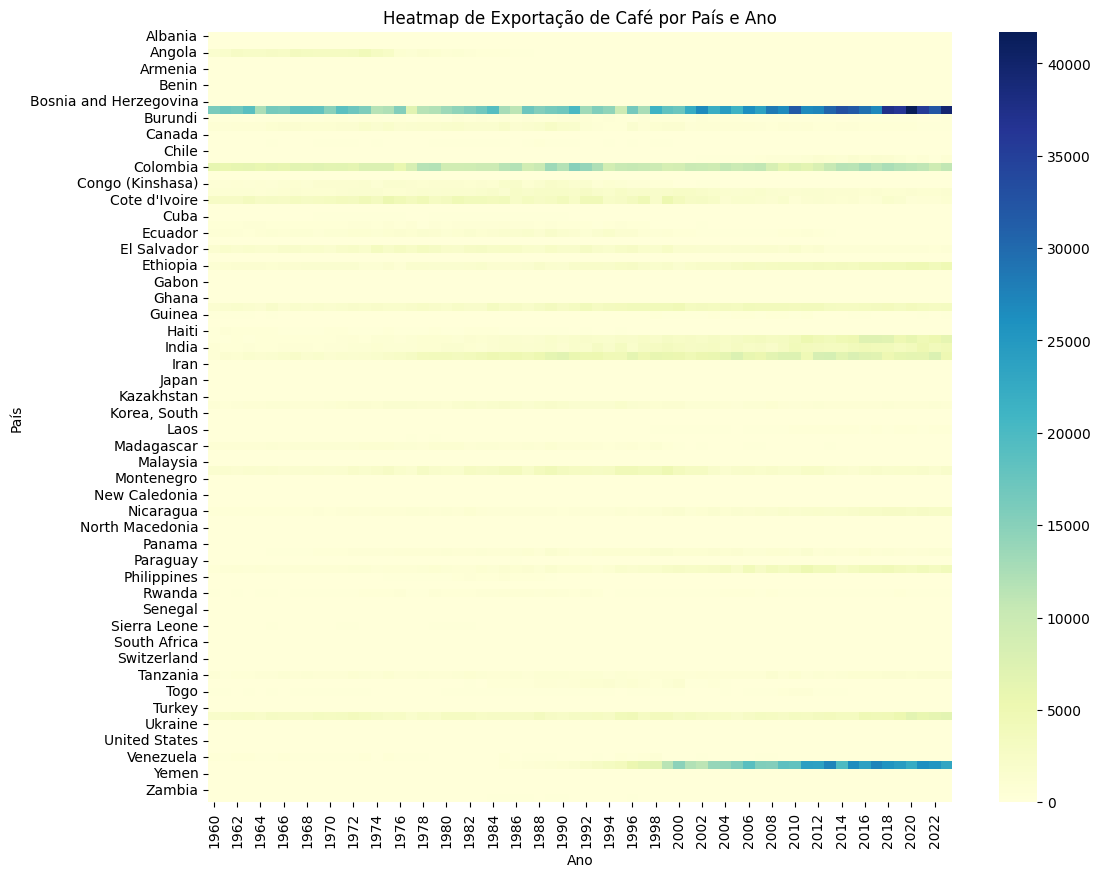

In [8]:
export_data_pivot = coffee_distribution.pivot_table(values="Bean Exports", index="Country", columns="Year", aggfunc="sum")

plt.figure(figsize=(12, 10))
sns.heatmap(export_data_pivot, cmap="YlGnBu")
plt.title("Heatmap de Exportação de Café por País e Ano")
plt.xlabel("Ano")
plt.ylabel("País")
plt.show()

In [9]:
new_section("Análise de Maiores Exportadores de Café")
exports_per_country = coffee_distribution.groupby("Country")["Bean Exports"].sum()
sorted_exports = exports_per_country.sort_values(ascending=False)
sorted_exports_list = list(sorted_exports.items())
print("Os 10 maiores exportadores de café são:")
for i in range(10):
    print(f"{i+1}. {sorted_exports_list[i][0]}: {sorted_exports_list[i][1]:,.0f}")
sep()


===================== Análise de Maiores Exportadores de Café =====================
Os 10 maiores exportadores de café são:
1. Brazil: 1,314,501
2. Colombia: 597,734
3. Vietnam: 536,153
4. Indonesia: 292,462
5. Uganda: 204,573
6. Guatemala: 180,844
7. Cote d'Ivoire: 175,138
8. Mexico: 150,239
9. Honduras: 149,011
10. Ethiopia: 138,951


In [10]:
new_section("Análise de Exportações de Café do Brasil 2023")
print(coffee_brasil_distribution_2023.head())
sep() 

================== Análise de Exportações de Café do Brasil 2023 ==================
         Country   January  February     March     April       May      June  \
0  United States  520339.0  476418.0  565904.0  496860.0  459915.0  467094.0   
1        Germany  441830.0  346155.0  312023.0  330729.0  258165.0  278946.0   
2          Italy  194631.0  204464.0  245960.0  279178.0  185307.0  170532.0   
3          Japan  144949.0  103023.0  223656.0  172614.0  185209.0  216865.0   
4        Belgium  178988.0  137883.0  136811.0  104135.0   76138.0  123321.0   

       July    August  September   October  November  December      Total  
0  454310.0  450380.0   480695.0  606155.0  513918.0  575207.0  6067195.0  
1  307045.0  430473.0   432963.0  612635.0  672547.0  593193.0  5016704.0  
2  213534.0  221622.0   336127.0  433496.0  390694.0  256384.0  3131929.0  
3  190943.0  258935.0   187283.0  186615.0  188895.0  300083.0  2359070.0  
4  299108.0  255250.0   122908.0  236905.0  283125.0  2

In [11]:
new_section("Coffee Distribuition Countries")
print("Número de colunas: ", coffee_distribution.shape[1])
print("Número de linhas: ", coffee_distribution.shape[0])
print("Países únicos: ", coffee_distribution["Country"].nunique())
print(coffee_distribution.columns)
sep()

========================= Coffee Distribuition Countries =========================
Número de colunas:  22
Número de linhas:  6016
Países únicos:  94
Index(['Country', 'Year', 'Arabica Production', 'Bean Exports', 'Bean Imports',
       'Beginning Stocks', 'Domestic Consumption', 'Ending Stocks', 'Exports',
       'Imports', 'Other Production', 'Production', 'Roast & Ground Exports',
       'Roast & Ground Imports', 'Robusta Production',
       'Rst,Ground Dom. Consum', 'Soluble Dom. Cons.', 'Soluble Exports',
       'Soluble Imports', 'Total Distribution', 'Total Supply', 'id'],
      dtype='object')


In [12]:
new_section("Cofee Distribution COuntries")
print(coffee_distribution["Country"].unique())
sep()

========================== Cofee Distribution COuntries ==========================
['Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia' 'Australia' 'Benin'
 'Bolivia' 'Bosnia and Herzegovina' 'Brazil' 'Burundi' 'Cameroon' 'Canada'
 'Central African Republic' 'Chile' 'China' 'Colombia'
 'Congo (Brazzaville)' 'Congo (Kinshasa)' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Cuba' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Ethiopia' 'European Union' 'Gabon' 'Georgia' 'Ghana'
 'Guatemala' 'Guinea' 'Guyana' 'Haiti' 'Honduras' 'India' 'Indonesia'
 'Iran' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan' 'Kenya' 'Korea, South'
 'Kosovo' 'Laos' 'Liberia' 'Madagascar' 'Malawi' 'Malaysia' 'Mexico'
 'Montenegro' 'Morocco' 'New Caledonia' 'New Zealand' 'Nicaragua'
 'Nigeria' 'North Macedonia' 'Norway' 'Panama' 'Papua New Guinea'
 'Paraguay' 'Peru' 'Philippines' 'Russia' 'Rwanda' 'Saudi Arabia'
 'Senegal' 'Serbia' 'Sierra Leone' 'Singapore' 'South Africa' 'Sri Lanka'
 'Switzerland' '

In [13]:
coffee_distribution_countries = coffee_distribution["Country"].unique()
coffee_quality_countries = coffee_quality_country["Country.of.Origin"].unique()

set_distribution_countries = set(coffee_distribution_countries)
set_quality_countries = set(coffee_quality_countries)

common_countries = set_distribution_countries.intersection(set_quality_countries)

common_countries_list = list(common_countries)
common_countries_list.sort()
new_section("Common Countries")
print(len(common_countries_list))
print(common_countries_list)
sep()

================================ Common Countries ================================
31
['Brazil', 'Burundi', 'China', 'Colombia', 'Costa Rica', 'Ecuador', 'El Salvador', 'Ethiopia', 'Guatemala', 'Haiti', 'Honduras', 'India', 'Indonesia', 'Japan', 'Kenya', 'Laos', 'Malawi', 'Mexico', 'Nicaragua', 'Panama', 'Papua New Guinea', 'Peru', 'Philippines', 'Rwanda', 'Taiwan', 'Tanzania', 'Thailand', 'Uganda', 'United States', 'Vietnam', 'Zambia']


In [14]:
new_section("Coffee Distribuition in common countries")
coffee_distribution_common = coffee_distribution[coffee_distribution["Country"].isin(coffee_quality_countries)]
print("Número de colunas: ", coffee_distribution_common.shape[1])
print("Número de linhas: ", coffee_distribution_common.shape[0])
print("Países únicos: ", coffee_distribution_common["Country"].nunique())
print(coffee_distribution_common.columns)
sep()

==================== Coffee Distribuition in common countries ====================
Número de colunas:  22
Número de linhas:  1984
Países únicos:  31
Index(['Country', 'Year', 'Arabica Production', 'Bean Exports', 'Bean Imports',
       'Beginning Stocks', 'Domestic Consumption', 'Ending Stocks', 'Exports',
       'Imports', 'Other Production', 'Production', 'Roast & Ground Exports',
       'Roast & Ground Imports', 'Robusta Production',
       'Rst,Ground Dom. Consum', 'Soluble Dom. Cons.', 'Soluble Exports',
       'Soluble Imports', 'Total Distribution', 'Total Supply', 'id'],
      dtype='object')


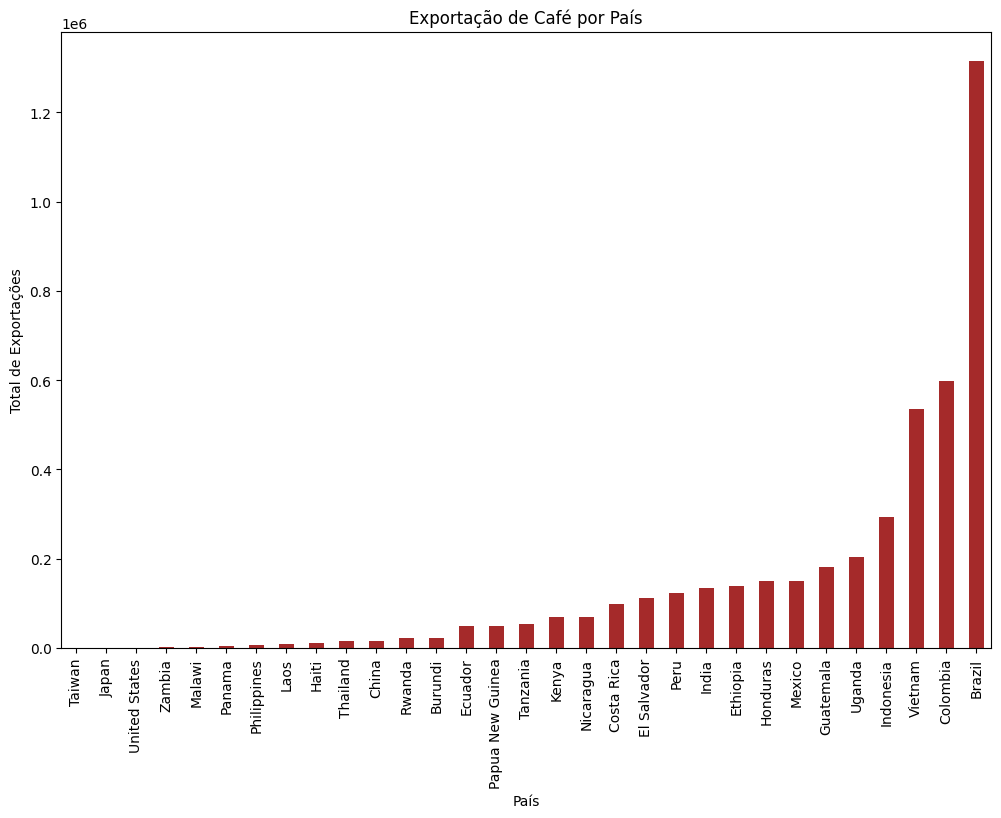

In [15]:
exports_per_country = coffee_distribution_common.groupby("Country")["Bean Exports"].sum().dropna()

plt.figure(figsize=(12, 8))
exports_per_country.sort_values().plot(kind="bar", color="brown") 
plt.title("Exportação de Café por País")
plt.xlabel("País")
plt.ylabel("Total de Exportações")
plt.xticks(rotation=90)
plt.show()

In [16]:
biggest_exporters = []
new_section("Análise de Maiores Exportadores de Café")
exports_per_country = coffee_distribution_common.groupby("Country")["Bean Exports"].sum()
sorted_exports = exports_per_country.sort_values(ascending=False)
sorted_exports_list = list(sorted_exports.items())
print("Os 15 maiores exportadores de café são:")
for i in range(15):
    biggest_exporters.append(sorted_exports_list[i][0])
    print(f"{i+1}. {sorted_exports_list[i][0]}: {sorted_exports_list[i][1]:,.0f}")
sep()

===================== Análise de Maiores Exportadores de Café =====================
Os 15 maiores exportadores de café são:
1. Brazil: 1,314,501
2. Colombia: 597,734
3. Vietnam: 536,153
4. Indonesia: 292,462
5. Uganda: 204,573
6. Guatemala: 180,844
7. Mexico: 150,239
8. Honduras: 149,011
9. Ethiopia: 138,951
10. India: 133,200
11. Peru: 122,392
12. El Salvador: 111,438
13. Costa Rica: 97,954
14. Nicaragua: 69,017
15. Kenya: 68,750


In [17]:
new_section("Coffee Brasil Distribution 2023")
print(coffee_brasil_distribution_2023.head())
sep()

========================= Coffee Brasil Distribution 2023 =========================
         Country   January  February     March     April       May      June  \
0  United States  520339.0  476418.0  565904.0  496860.0  459915.0  467094.0   
1        Germany  441830.0  346155.0  312023.0  330729.0  258165.0  278946.0   
2          Italy  194631.0  204464.0  245960.0  279178.0  185307.0  170532.0   
3          Japan  144949.0  103023.0  223656.0  172614.0  185209.0  216865.0   
4        Belgium  178988.0  137883.0  136811.0  104135.0   76138.0  123321.0   

       July    August  September   October  November  December      Total  
0  454310.0  450380.0   480695.0  606155.0  513918.0  575207.0  6067195.0  
1  307045.0  430473.0   432963.0  612635.0  672547.0  593193.0  5016704.0  
2  213534.0  221622.0   336127.0  433496.0  390694.0  256384.0  3131929.0  
3  190943.0  258935.0   187283.0  186615.0  188895.0  300083.0  2359070.0  
4  299108.0  255250.0   122908.0  236905.0  283125.0  2

In [18]:
new_section("Coffee Brasil Distribution 2023")
print("Número de colunas: ", coffee_brasil_distribution_2023.shape[1])
print("Número de linhas: ", coffee_brasil_distribution_2023.shape[0])
print(coffee_brasil_distribution_2023.columns)
sep()

========================= Coffee Brasil Distribution 2023 =========================
Número de colunas:  14
Número de linhas:  161
Index(['Country', 'January', 'February', 'March', 'April', 'May', 'June',
       'July', 'August', 'September', 'October', 'November', 'December',
       'Total'],
      dtype='object')


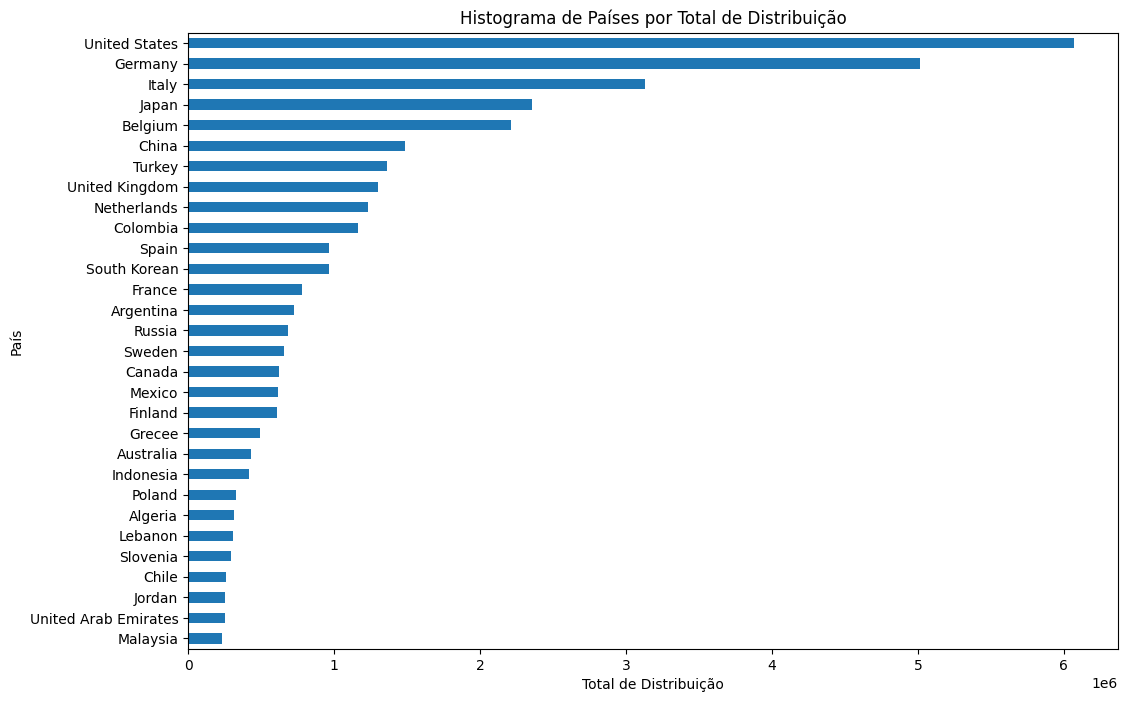

In [19]:
country_totals = coffee_brasil_distribution_2023.groupby("Country")["Total"].sum().sort_values()
top_30_countries = country_totals.nlargest(30)
# Crie o histograma com essas somas
plt.figure(figsize=(12, 8))
top_30_countries.sort_values().plot(kind="barh")  # Barra horizontal para melhor visualização se houver muitos países
plt.title("Histograma de Países por Total de Distribuição")
plt.xlabel("Total de Distribuição")
plt.ylabel("País")
plt.show()

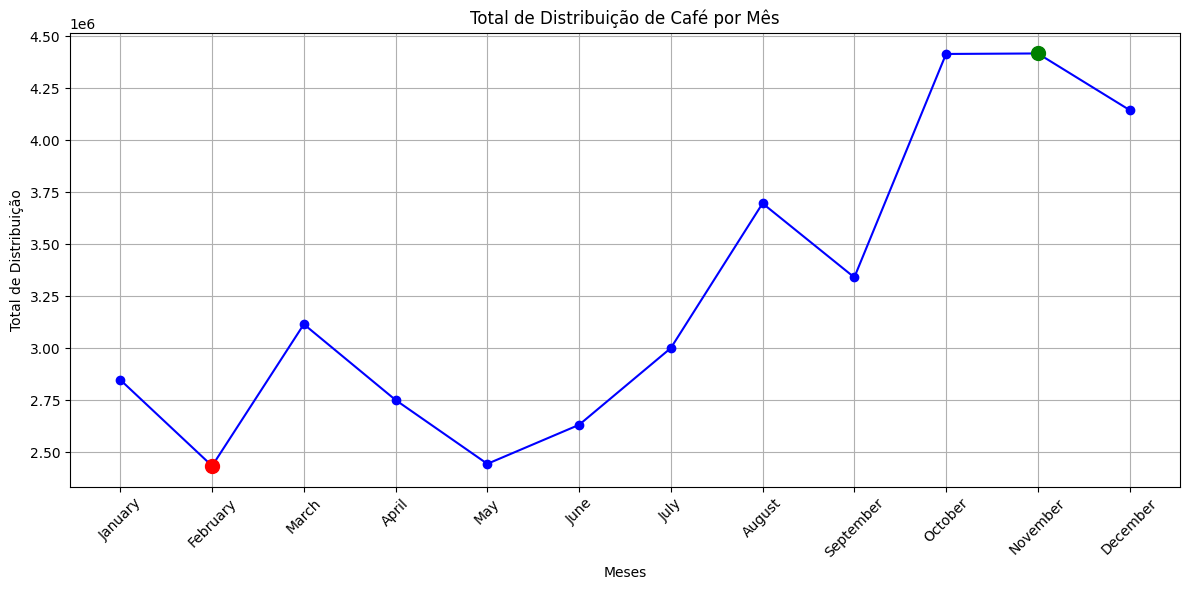

In [20]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

monthly_totals = coffee_brasil_distribution_2023[months].sum()

plt.figure(figsize=(12, 6))
monthly_totals.plot(kind="line", marker="o", color="blue") 

max_month = monthly_totals.idxmax()
min_month = monthly_totals.idxmin()

plt.scatter(months.index(max_month), monthly_totals[max_month], color="green", zorder=5, s=100)
plt.scatter(months.index(min_month), monthly_totals[min_month], color="red", zorder=5, s=100)

plt.title("Total de Distribuição de Café por Mês")
plt.xlabel("Meses")
plt.ylabel("Total de Distribuição")
plt.xticks(range(len(months)), months, rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [21]:
new_section("Coffee Quality Data")
print(coffee_quality.head())
sep()

=============================== Coffee Quality Data ===============================
   REC_ID  Species Continent.of.Origin Country.of.Origin  Harvest.Year  \
0       0  Arabica              Africa          Ethiopia        2014.0   
1       1  Arabica              Africa          Ethiopia        2014.0   
2       2  Arabica       North America         Guatemala           NaN   
3       3  Arabica              Africa          Ethiopia        2014.0   
4       4  Arabica              Africa          Ethiopia        2014.0   

  Expiration  Variety  Color Processing.Method  Aroma  ...  Body  Balance  \
0   04/03/16      NaN  Green      Washed / Wet   8.67  ...  8.50     8.42   
1   04/03/16    Other  Green      Washed / Wet   8.75  ...  8.42     8.42   
2   05/31/11  Bourbon    NaN               NaN   8.42  ...  8.33     8.42   
3   03/25/16      NaN  Green     Natural / Dry   8.17  ...  8.50     8.25   
4   04/03/16    Other  Green      Washed / Wet   8.25  ...  8.42     8.33   

   Unifo

In [22]:
new_section("Coffee Quality Data Columns")
print("Número de colunas: ", coffee_quality.shape[0])
print("Número de linhas: ", coffee_quality.shape[1])
print(coffee_quality.columns)
sep()

=========================== Coffee Quality Data Columns ===========================
Número de colunas:  1339
Número de linhas:  23
Index(['REC_ID', 'Species', 'Continent.of.Origin', 'Country.of.Origin',
       'Harvest.Year', 'Expiration', 'Variety', 'Color', 'Processing.Method',
       'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
       'Uniformity', 'Clean.Cup', 'Sweetness', 'Moisture', 'Quakers',
       'Category.One.Defects', 'Category.Two.Defects', 'id'],
      dtype='object')


In [23]:
countries = coffee_quality["Country.of.Origin"].unique()
new_section("Unique Countries")
print(len(countries))
print(countries)
sep()

================================ Unique Countries ================================
35
['Ethiopia' 'Guatemala' 'Brazil' 'Peru' 'United States' 'Indonesia'
 'China' 'Costa Rica' 'Mexico' 'Uganda' 'Honduras' 'Taiwan' 'Nicaragua'
 'Tanzania' 'Kenya' 'Thailand' 'Colombia' 'Panama' 'Papua New Guinea'
 'El Salvador' 'Japan' 'Ecuador' 'Haiti' 'Burundi' 'Vietnam' 'Philippines'
 'Rwanda' 'Malawi' 'Laos' 'Zambia' 'Myanmar' 'Mauritius' 'Cote dIvoire'
 nan 'India']


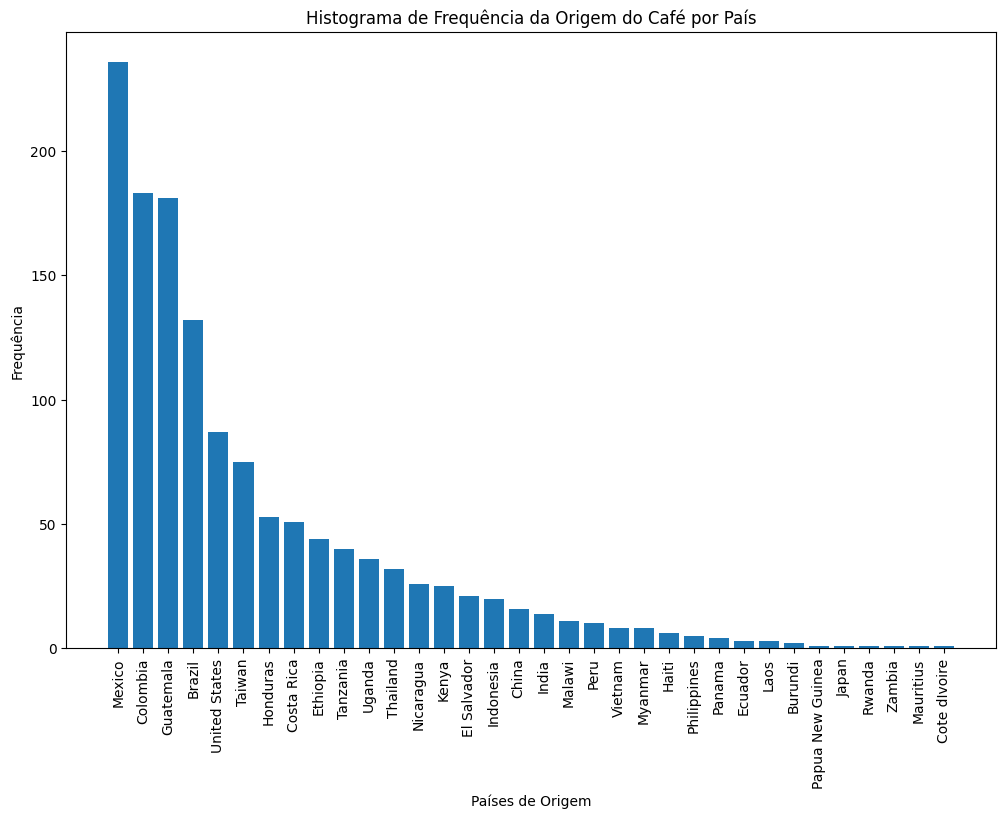

In [24]:
country_counts = coffee_quality["Country.of.Origin"].value_counts()
plt.figure(figsize=(12, 8))  
plt.bar(country_counts.index, country_counts.values) 
plt.xlabel("Países de Origem") 
plt.ylabel("Frequência") 
plt.xticks(rotation=90)  
plt.title("Histograma de Frequência da Origem do Café por País")  
plt.show()  

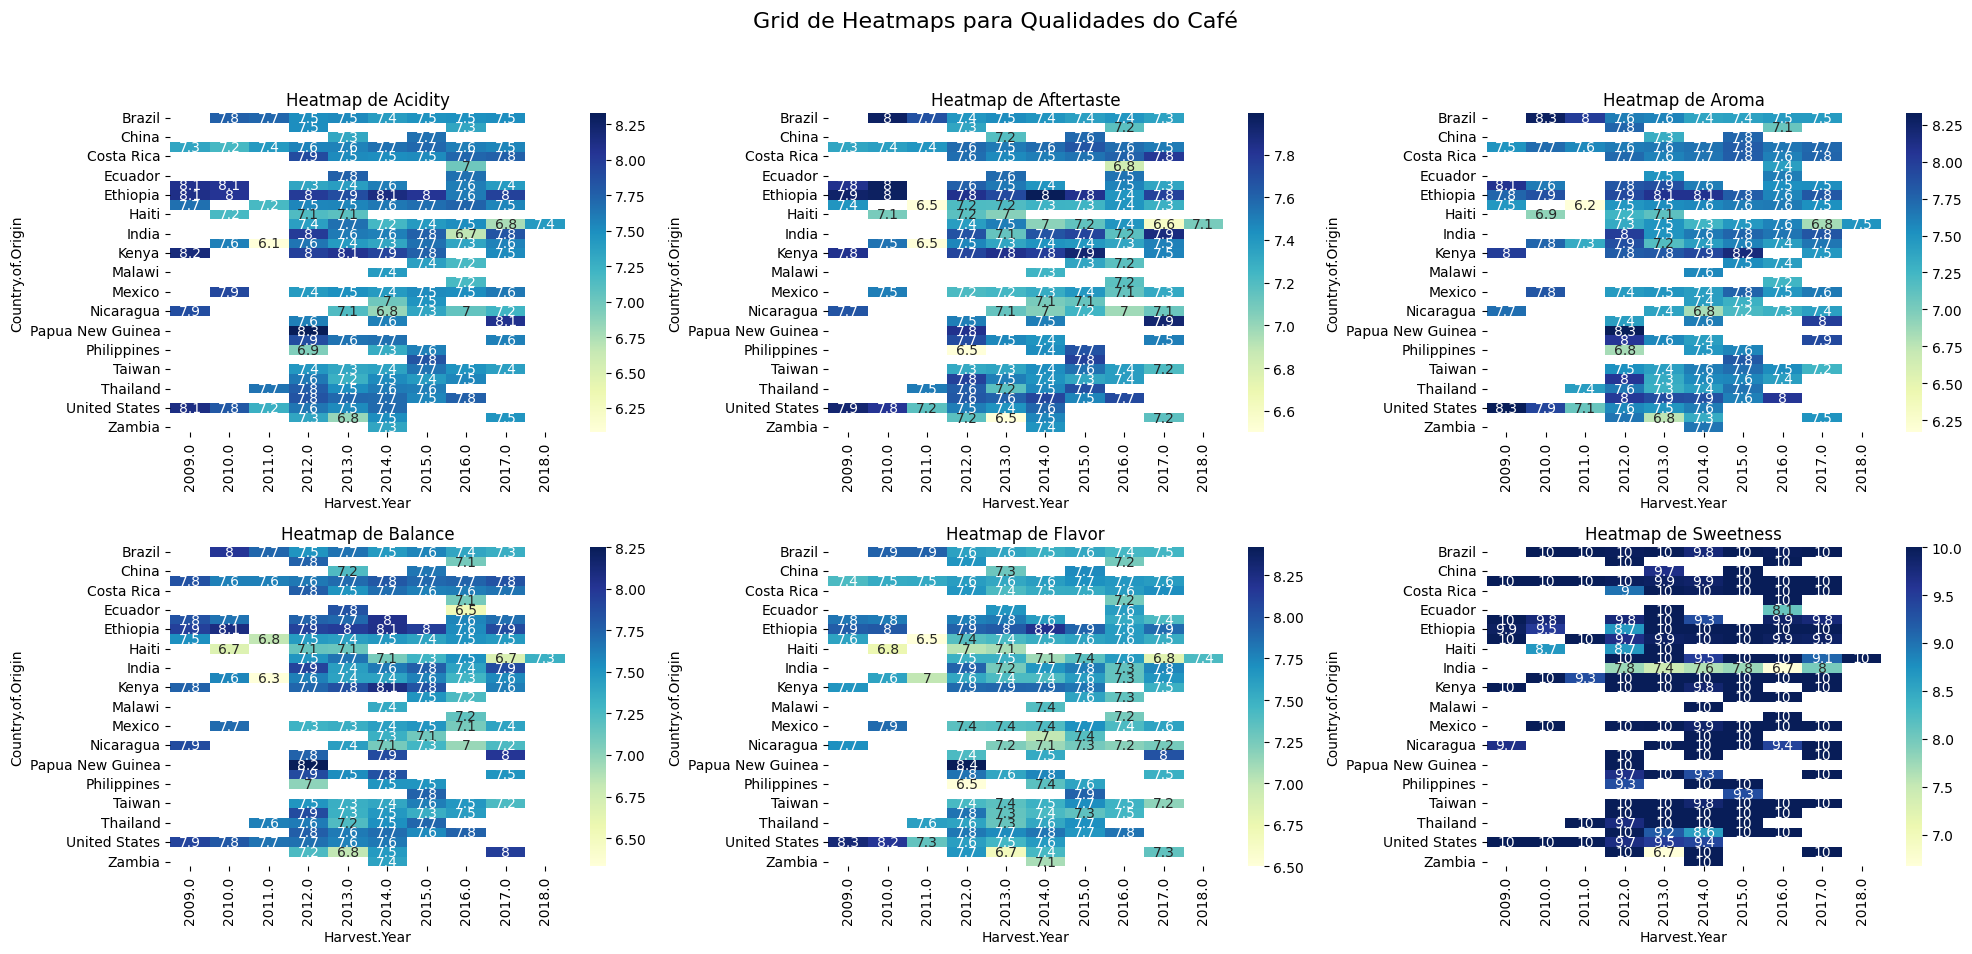

In [25]:
year_col = "Harvest.Year"
country_col = "Country.of.Origin"

attributes = ["Acidity", "Aftertaste", "Aroma", "Balance", "Flavor", "Sweetness"]

num_rows = 2 
num_cols = 3 

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))
fig.suptitle("Grid de Heatmaps para Qualidades do Café", fontsize=16)

for i, attribute in enumerate(attributes):
    heatmap_data = coffee_quality.pivot_table(
        index=country_col, 
        columns=year_col, 
        values=attribute, 
        aggfunc="mean"
    )
    
    row = i // num_cols
    col = i % num_cols
    
    sns.heatmap(heatmap_data, ax=axes[row, col], cmap="YlGnBu", annot=True)
    axes[row, col].set_title(f"Heatmap de {attribute}")

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()

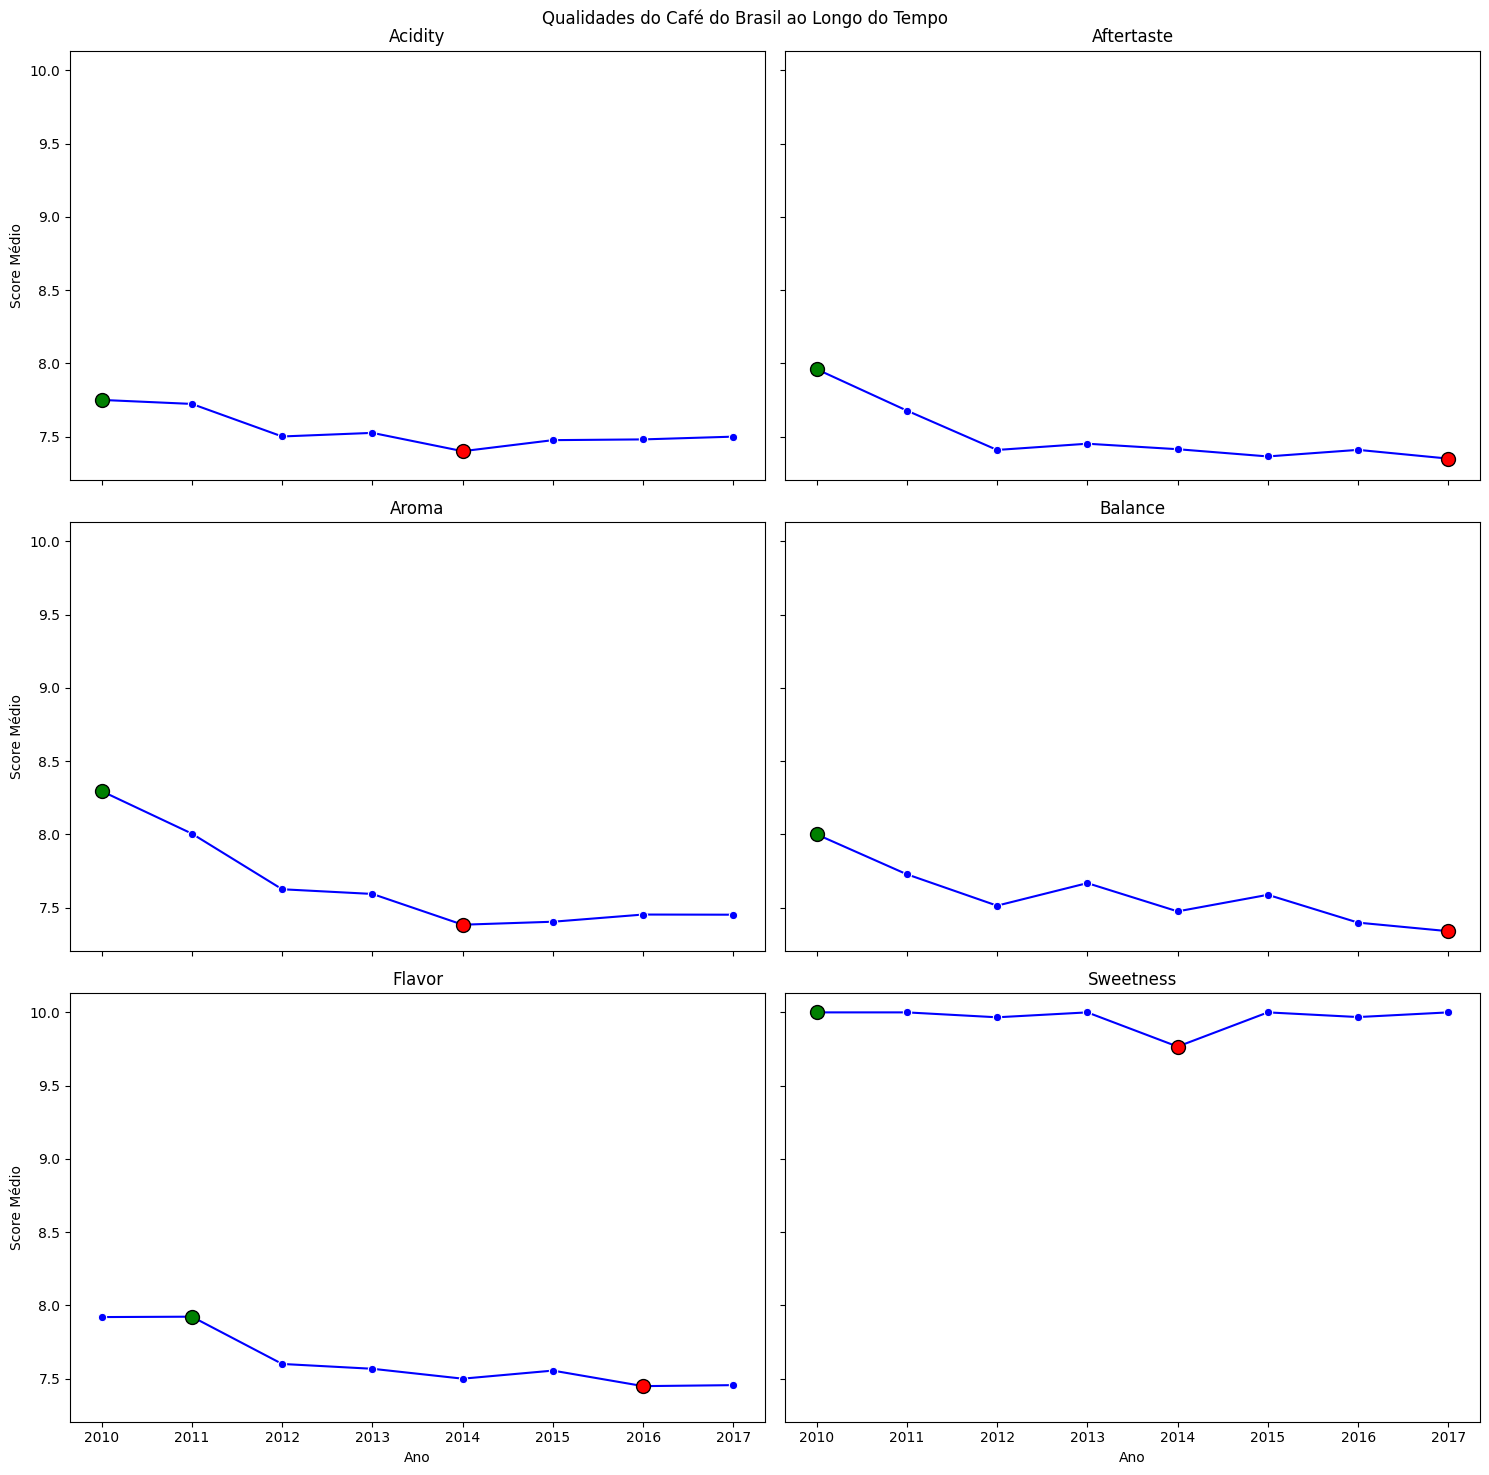

In [26]:
df_brazil = coffee_quality[coffee_quality["Country.of.Origin"] == "Brazil"]

attributes = ["Acidity", "Aftertaste", "Aroma", "Balance", "Flavor", "Sweetness"]

fig, axes = plt.subplots(3, 2, figsize=(15, 15), sharex=True, sharey=True)
fig.suptitle("Qualidades do Café do Brasil ao Longo do Tempo")

for i, attribute in enumerate(attributes):
    ax = axes[i//2, i%2]  

    group_data = df_brazil.groupby("Harvest.Year")[attribute].mean()

    max_year = group_data.idxmax()
    min_year = group_data.idxmin()
    max_score = group_data.max()
    min_score = group_data.min()

    sns.lineplot(ax=ax, x=group_data.index, y=group_data.values, marker="o", color="blue")

    ax.scatter(max_year, max_score, color="green", s=100, edgecolor="black", zorder=5)

    ax.scatter(min_year, min_score, color="red", s=100, edgecolor="black", zorder=5)

    ax.set_title(attribute)
    ax.set_xlabel("Ano")
    ax.set_ylabel("Score Médio")

plt.tight_layout()
plt.show()

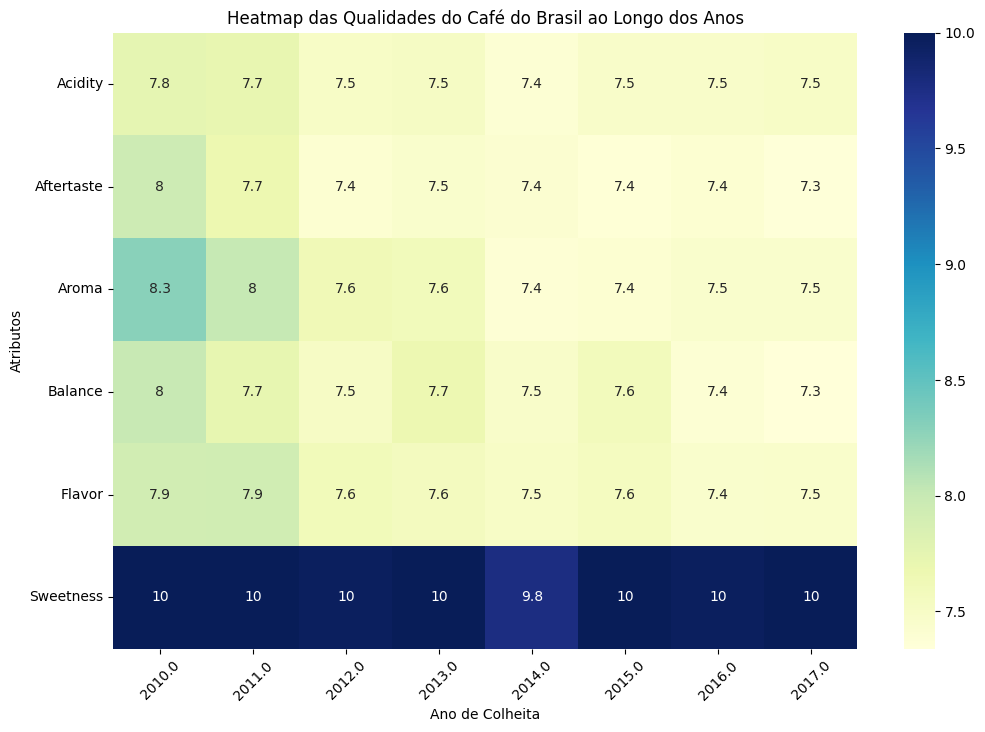

In [27]:
attributes = ["Acidity", "Aftertaste", "Aroma", "Balance", "Flavor", "Sweetness"]


df_brazil = coffee_quality[coffee_quality["Country.of.Origin"] == "Brazil"]

pivot_df = df_brazil.pivot_table(index="Harvest.Year", values=attributes, aggfunc="mean")

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df.T, cmap="YlGnBu", annot=True)  
plt.title("Heatmap das Qualidades do Café do Brasil ao Longo dos Anos")
plt.xlabel("Ano de Colheita")
plt.ylabel("Atributos")
plt.yticks(rotation=0) 
plt.xticks(rotation=45) 
plt.show()

In [28]:
new_section("Coffee Quality Countries")
print(coffee_quality["Country.of.Origin"].unique())
sep()

============================ Coffee Quality Countries ============================
['Ethiopia' 'Guatemala' 'Brazil' 'Peru' 'United States' 'Indonesia'
 'China' 'Costa Rica' 'Mexico' 'Uganda' 'Honduras' 'Taiwan' 'Nicaragua'
 'Tanzania' 'Kenya' 'Thailand' 'Colombia' 'Panama' 'Papua New Guinea'
 'El Salvador' 'Japan' 'Ecuador' 'Haiti' 'Burundi' 'Vietnam' 'Philippines'
 'Rwanda' 'Malawi' 'Laos' 'Zambia' 'Myanmar' 'Mauritius' 'Cote dIvoire'
 nan 'India']


In [29]:
filter = coffee_quality["Country.of.Origin"].isin(biggest_exporters)
coffee_quality_biggest_exporters = coffee_quality[filter] 
new_section("Coffee Quality Data for the biggest exporters")
print("Número de colunas: ", coffee_quality_biggest_exporters.shape[1])
print("Número de linhas: ", coffee_quality_biggest_exporters.shape[0])
print(coffee_quality_biggest_exporters.columns)
sep()

================== Coffee Quality Data for the biggest exporters ==================
Número de colunas:  23
Número de linhas:  1040
Index(['REC_ID', 'Species', 'Continent.of.Origin', 'Country.of.Origin',
       'Harvest.Year', 'Expiration', 'Variety', 'Color', 'Processing.Method',
       'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
       'Uniformity', 'Clean.Cup', 'Sweetness', 'Moisture', 'Quakers',
       'Category.One.Defects', 'Category.Two.Defects', 'id'],
      dtype='object')


In [30]:
new_section("Coffee Quality Data for the biggest exporters")
print(coffee_quality_biggest_exporters.head())
sep()

================== Coffee Quality Data for the biggest exporters ==================
   REC_ID  Species Continent.of.Origin Country.of.Origin  Harvest.Year  \
0       0  Arabica              Africa          Ethiopia        2014.0   
1       1  Arabica              Africa          Ethiopia        2014.0   
2       2  Arabica       North America         Guatemala           NaN   
3       3  Arabica              Africa          Ethiopia        2014.0   
4       4  Arabica              Africa          Ethiopia        2014.0   

  Expiration  Variety  Color Processing.Method  Aroma  ...  Body  Balance  \
0   04/03/16      NaN  Green      Washed / Wet   8.67  ...  8.50     8.42   
1   04/03/16    Other  Green      Washed / Wet   8.75  ...  8.42     8.42   
2   05/31/11  Bourbon    NaN               NaN   8.42  ...  8.33     8.42   
3   03/25/16      NaN  Green     Natural / Dry   8.17  ...  8.50     8.25   
4   04/03/16    Other  Green      Washed / Wet   8.25  ...  8.42     8.33   

   Unifo

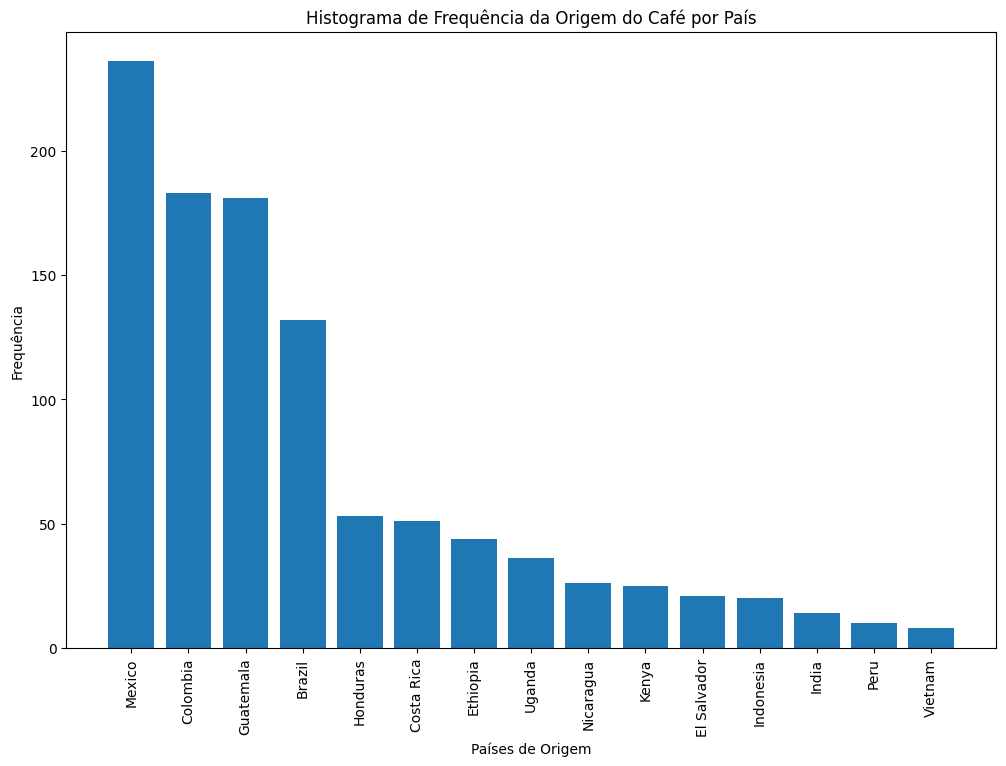

In [31]:
country_counts = coffee_quality_biggest_exporters["Country.of.Origin"].value_counts()
plt.figure(figsize=(12, 8))  
plt.bar(country_counts.index, country_counts.values) 
plt.xlabel("Países de Origem") 
plt.ylabel("Frequência") 
plt.xticks(rotation=90)  
plt.title("Histograma de Frequência da Origem do Café por País")  
plt.show()  

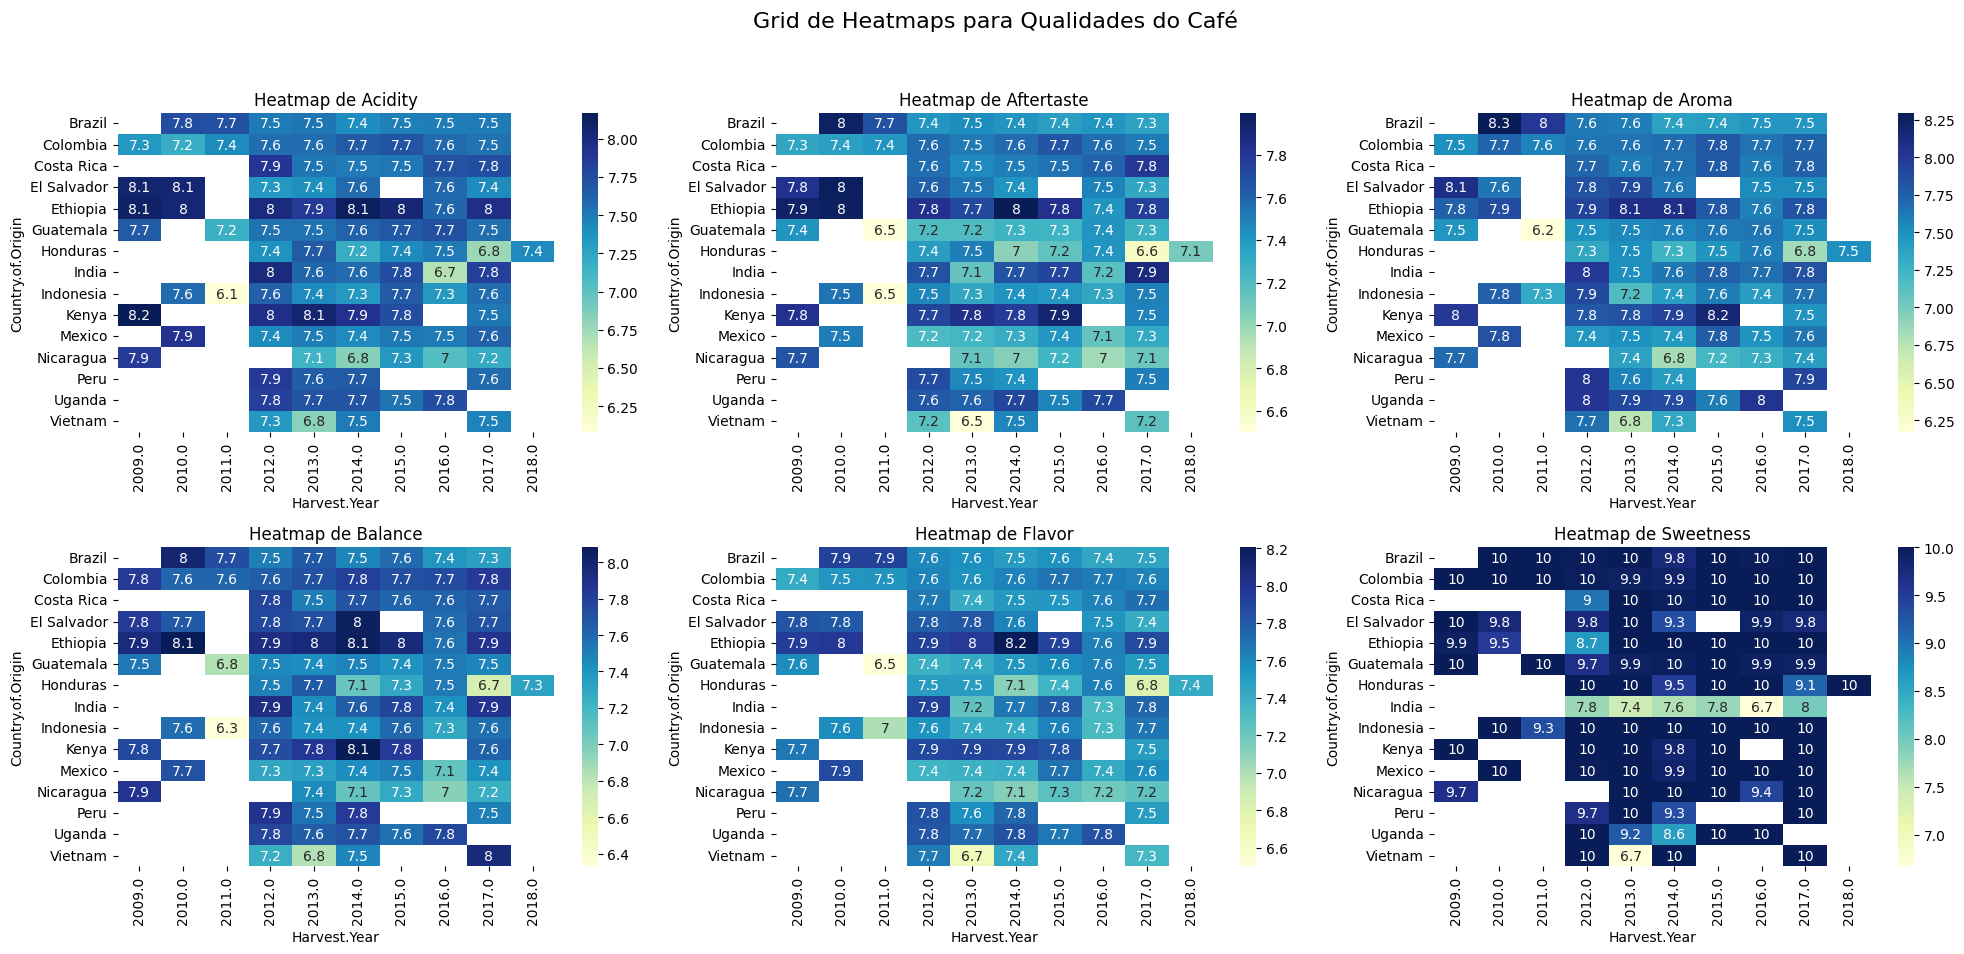

In [32]:
year_col = "Harvest.Year"
country_col = "Country.of.Origin"

attributes = ["Acidity", "Aftertaste", "Aroma", "Balance", "Flavor", "Sweetness"]

num_rows = 2 
num_cols = 3 

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))
fig.suptitle("Grid de Heatmaps para Qualidades do Café", fontsize=16)

for i, attribute in enumerate(attributes):
    heatmap_data = coffee_quality_biggest_exporters.pivot_table(
        index=country_col, 
        columns=year_col, 
        values=attribute, 
        aggfunc="mean"
    )
    
    row = i // num_cols
    col = i % num_cols
    
    sns.heatmap(heatmap_data, ax=axes[row, col], cmap="YlGnBu", annot=True)
    axes[row, col].set_title(f"Heatmap de {attribute}")

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()

In [33]:
new_section("Coffee Quality Country Data")
print(coffee_quality_country.head())
sep()

=========================== Coffee Quality Country Data ===========================
  Country.of.Origin  AVG_Aroma  AVG_Flavor  AVG_Aftertaste  AVG_Acidity  \
0            Brazil   7.553106    7.573561        7.440530     7.511439   
1           Burundi   7.415000    7.460000        7.250000     7.415000   
2             China   7.641250    7.625625        7.484375     7.578125   
3          Colombia   7.653060    7.597104        7.524699     7.560000   
4        Costa Rica   7.671373    7.537255        7.534510     7.573922   

   AVG_Body  AVG_Balance  AVG_Uniformity  AVG_Clean.Cup  AVG_Sweetness  \
0  7.544545     7.531515        9.884924       9.853485       9.949394   
1  7.290000     7.415000       10.000000      10.000000      10.000000   
2  7.573750     7.548125        9.958125       9.958125       9.916250   
3  7.609508     7.708415        9.934426       9.945355       9.952678   
4  7.537451     7.637255        9.856275       9.869216       9.908431   

   AVG_Moisture  AVG

In [34]:
new_section("Coffee Quality Country Data Columns")
print("Número de colunas: ", coffee_quality_country.shape[1])
print("Número de linhas: ", coffee_quality_country.shape[0])
print(coffee_quality_country.columns)
sep()

======================= Coffee Quality Country Data Columns =======================
Número de colunas:  16
Número de linhas:  34
Index(['Country.of.Origin', 'AVG_Aroma', 'AVG_Flavor', 'AVG_Aftertaste',
       'AVG_Acidity', 'AVG_Body', 'AVG_Balance', 'AVG_Uniformity',
       'AVG_Clean.Cup', 'AVG_Sweetness', 'AVG_Moisture', 'AVG_Quakers',
       'AVG_Category.One.Defects', 'AVG_Category.Two.Defects', 'Rec_Cnt',
       'id'],
      dtype='object')


In [35]:
attributes = ["AVG_Aroma", "AVG_Flavor", "AVG_Aftertaste", "AVG_Acidity", "AVG_Balance", "AVG_Sweetness"]
top_countries_by_attribute = {}
top_countries_indices = []
for attribute in attributes:
    top_countries = (
        coffee_quality_country[attribute] 
        .sort_values(ascending=False)  
        .head(10) 
    )

    top_countries_indices.append(set(top_countries))
    top_countries_by_attribute[attribute] = top_countries


common_countries = set.intersection(*top_countries_indices)

print("Países que aparecem nas listas dos 10 melhores para todos os seis atributos:")
print(common_countries)


Países que aparecem nas listas dos 10 melhores para todos os seis atributos:
set()


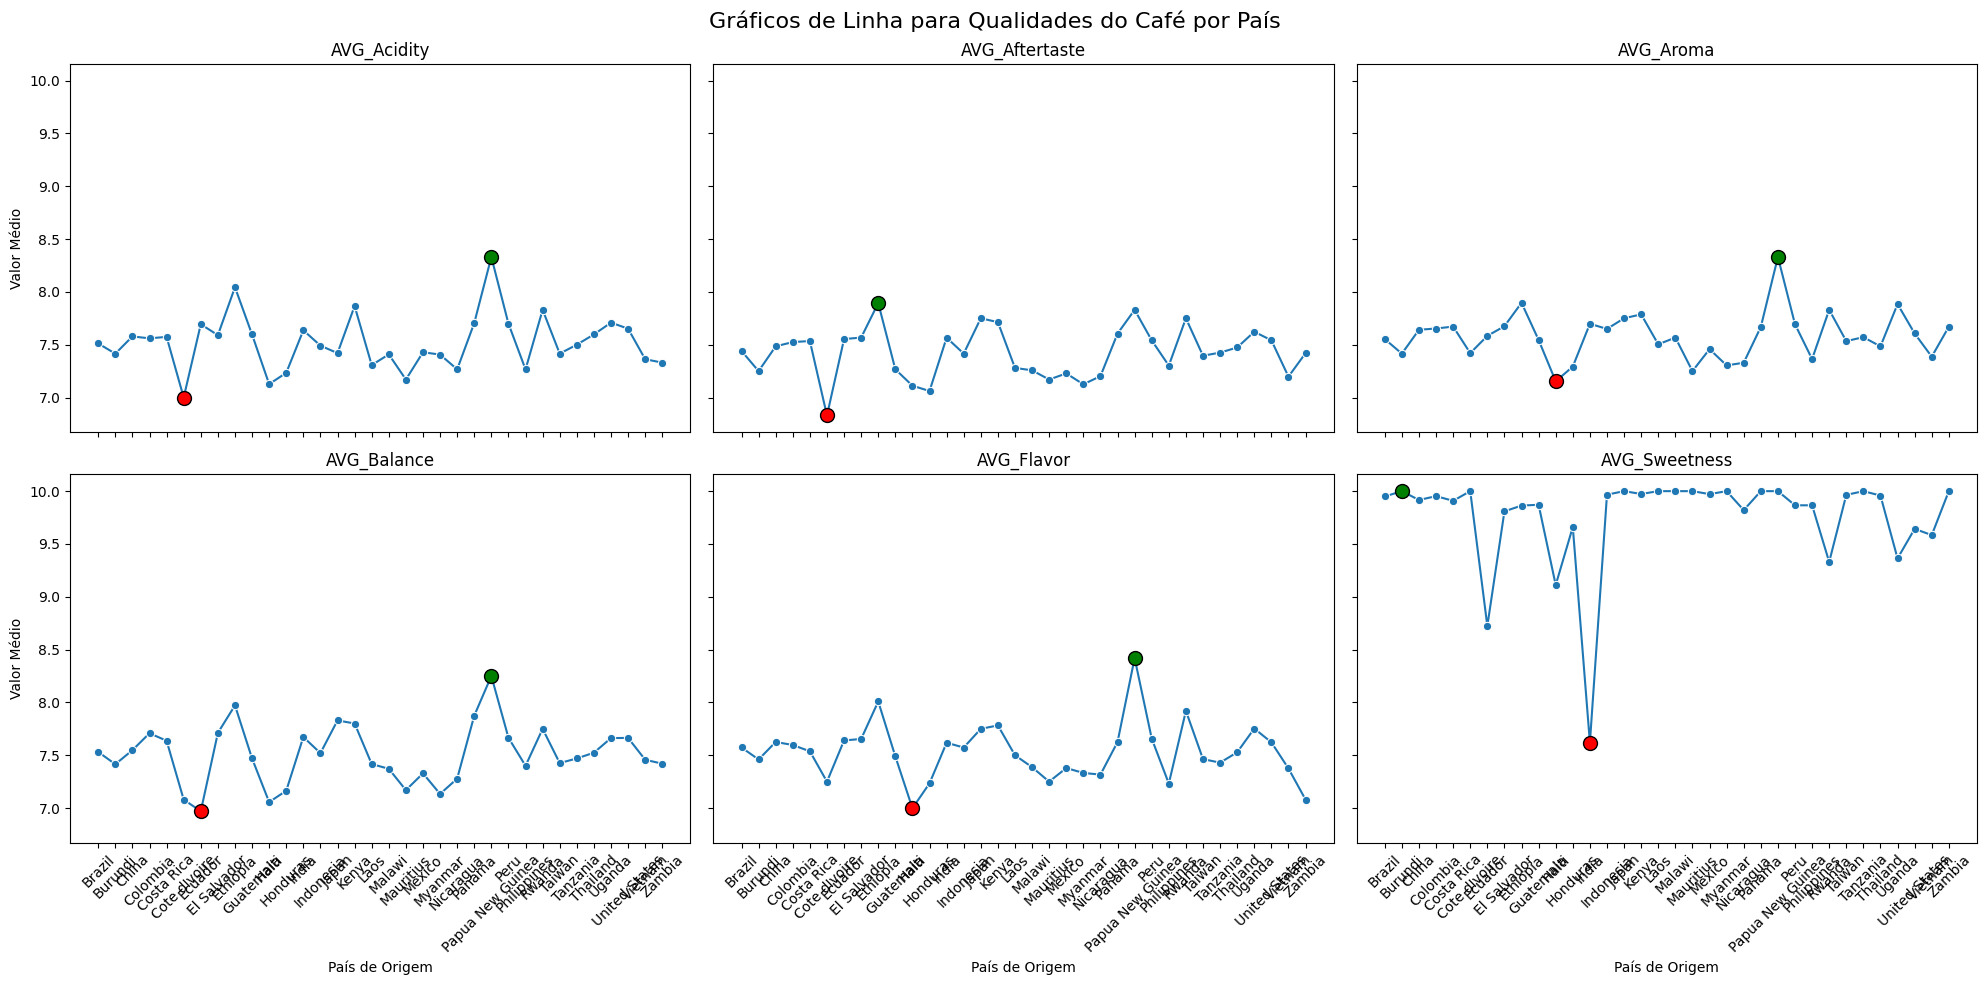

In [36]:

attributes = ["Acidity", "Aftertaste", "Aroma", "Balance", "Flavor", "Sweetness"]
country_col = "Country.of.Origin"

num_rows = 2
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10), sharex=True, sharey=True)
fig.suptitle("Gráficos de Linha para Qualidades do Café por País", fontsize=16)

for i, attribute in enumerate(attributes):
    ax = axes[i // num_cols, i % num_cols]
    
    attribute_avg = f"AVG_{attribute}"
    data = coffee_quality_country.groupby(country_col)[attribute_avg].mean().reset_index()

    sns.lineplot(data=data, x=country_col, y=attribute_avg, ax=ax, marker="o")
    
    max_value = data[attribute_avg].max()
    min_value = data[attribute_avg].min()
    max_country = data[data[attribute_avg] == max_value][country_col].values[0]
    min_country = data[data[attribute_avg] == min_value][country_col].values[0]
    
    ax.scatter(max_country, max_value, color="green", zorder=5, edgecolor="black", s=100)  
    ax.scatter(min_country, min_value, color="red", zorder=5, edgecolor="black", s=100)
    
    ax.set_title(f"AVG_{attribute}")
    ax.set_xlabel("País de Origem")
    ax.set_ylabel("Valor Médio")
    ax.tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

In [37]:
new_section("Coffee Quality Country Data Min and Max")
for attribute in attributes:
    print(f"{attribute}:")
    print("Mínimo:", coffee_quality_country["AVG_"+attribute].min())
    print("Máximo:", coffee_quality_country["AVG_"+attribute].max())
    sep(20, "-"	)
sep()

===================== Coffee Quality Country Data Min and Max =====================
Acidity:
Mínimo: 7.0
Máximo: 8.33
--------------------
Aftertaste:
Mínimo: 6.83
Máximo: 7.893863636363636
--------------------
Aroma:
Mínimo: 7.153333333333333
Máximo: 8.33
--------------------
Balance:
Mínimo: 6.97
Máximo: 8.25
--------------------
Flavor:
Mínimo: 6.998333333333334
Máximo: 8.42
--------------------
Sweetness:
Mínimo: 7.619285714285715
Máximo: 10.0
--------------------


In [38]:
filter = coffee_quality_country["Country.of.Origin"].isin(biggest_exporters)
coffee_quality_country_biggest_exporters = coffee_quality_country[filter]

In [39]:
new_section("Coffee Quality Country Data")
print(coffee_quality_country_biggest_exporters.head())
sep()

=========================== Coffee Quality Country Data ===========================
  Country.of.Origin  AVG_Aroma  AVG_Flavor  AVG_Aftertaste  AVG_Acidity  \
0            Brazil   7.553106    7.573561        7.440530     7.511439   
3          Colombia   7.653060    7.597104        7.524699     7.560000   
4        Costa Rica   7.671373    7.537255        7.534510     7.573922   
7       El Salvador   7.674762    7.654286        7.567143     7.590476   
8          Ethiopia   7.896364    8.009091        7.893864     8.043636   

   AVG_Body  AVG_Balance  AVG_Uniformity  AVG_Clean.Cup  AVG_Sweetness  \
0  7.544545     7.531515        9.884924       9.853485       9.949394   
3  7.609508     7.708415        9.934426       9.945355       9.952678   
4  7.537451     7.637255        9.856275       9.869216       9.908431   
7  7.606667     7.711429        9.936190       9.936190       9.808571   
8  7.924091     7.972273        9.878409       9.954318       9.863409   

   AVG_Moisture  AVG

In [40]:
new_section("Coffee Quality Country Data Columns")
print("Número de colunas: ", coffee_quality_country_biggest_exporters.shape[1])
print("Número de linhas: ", coffee_quality_country_biggest_exporters.shape[0])
print(coffee_quality_country_biggest_exporters.columns)
sep()

======================= Coffee Quality Country Data Columns =======================
Número de colunas:  16
Número de linhas:  15
Index(['Country.of.Origin', 'AVG_Aroma', 'AVG_Flavor', 'AVG_Aftertaste',
       'AVG_Acidity', 'AVG_Body', 'AVG_Balance', 'AVG_Uniformity',
       'AVG_Clean.Cup', 'AVG_Sweetness', 'AVG_Moisture', 'AVG_Quakers',
       'AVG_Category.One.Defects', 'AVG_Category.Two.Defects', 'Rec_Cnt',
       'id'],
      dtype='object')


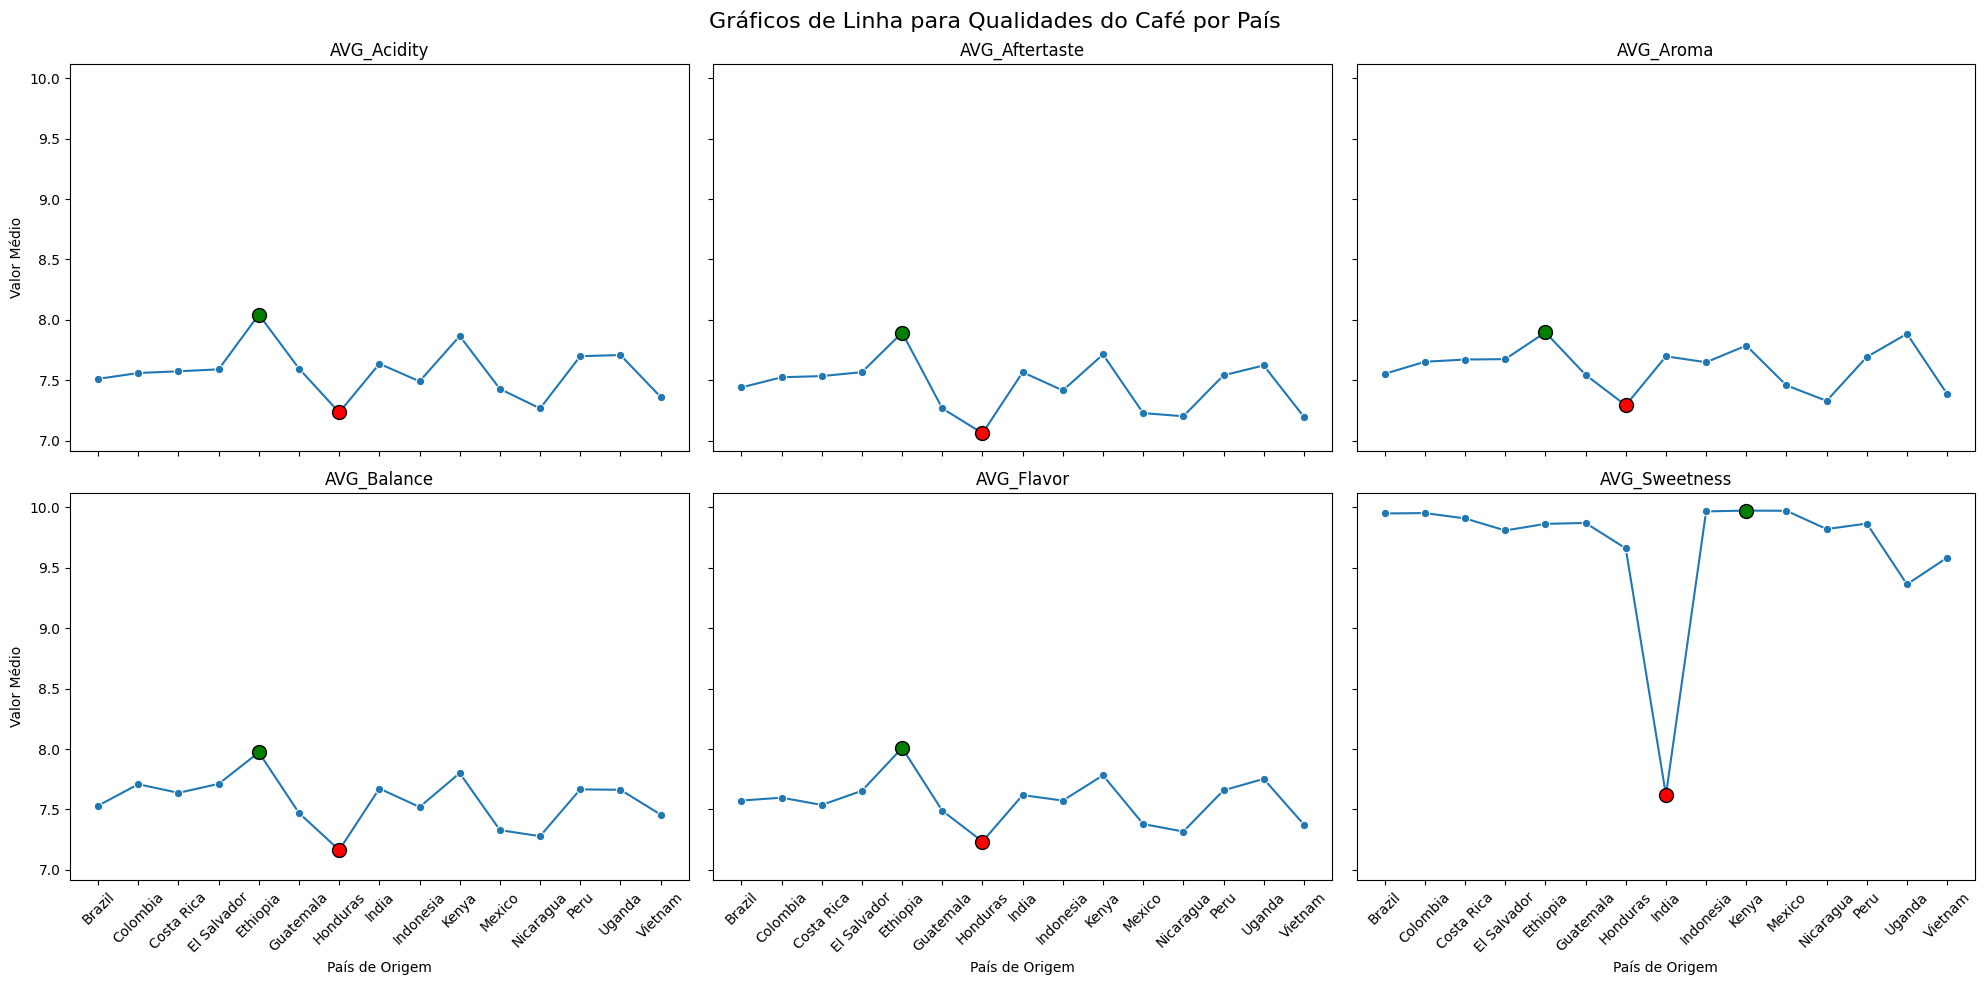

In [41]:

attributes = ["Acidity", "Aftertaste", "Aroma", "Balance", "Flavor", "Sweetness"]
country_col = "Country.of.Origin"

num_rows = 2
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10), sharex=True, sharey=True)
fig.suptitle("Gráficos de Linha para Qualidades do Café por País", fontsize=16)

for i, attribute in enumerate(attributes):
    ax = axes[i // num_cols, i % num_cols]
    
    attribute_avg = f"AVG_{attribute}"
    data = coffee_quality_country_biggest_exporters.groupby(country_col)[attribute_avg].mean().reset_index()
    
    sns.lineplot(data=data, x=country_col, y=attribute_avg, ax=ax, marker="o")
    
    max_value = data[attribute_avg].max()
    min_value = data[attribute_avg].min()
    max_country = data[data[attribute_avg] == max_value][country_col].values[0]
    min_country = data[data[attribute_avg] == min_value][country_col].values[0]

    ax.scatter(max_country, max_value, color="green", zorder=5, edgecolor="black", s=100)  
    ax.scatter(min_country, min_value, color="red", zorder=5, edgecolor="black", s=100)
    
    ax.set_title(f"AVG_{attribute}")
    ax.set_xlabel("País de Origem")
    ax.set_ylabel("Valor Médio")
    ax.tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

In [42]:
new_section("Coffee Quality Continent Data")
print(coffee_quality_continent.head())
sep()

========================== Coffee Quality Continent Data ==========================
  Country.of.Origin  AVG_Aroma  AVG_Flavor  AVG_Aftertaste  AVG_Acidity  \
0            Africa   7.759444    7.709444        7.623889     7.739074   
1              Asia   7.539121    7.499286        7.409231     7.478407   
2     North America   7.504346    7.445714        7.300767     7.496677   
3           Oceania   8.330000    8.420000        7.830000     8.330000   
4     South America   7.613415    7.589878        7.491585     7.545915   

   AVG_Body  AVG_Balance  AVG_Uniformity  AVG_Clean.Cup  AVG_Sweetness  \
0  7.680741     7.689938        9.954568       9.979321       9.813148   
1  7.509066     7.473187        9.908187       9.970604       9.761813   
2  7.450977     7.432496        9.752632       9.734226       9.852992   
3  8.000000     8.250000        9.330000       9.330000      10.000000   
4  7.574756     7.629177        9.902866       9.894268       9.937470   

   AVG_Moisture  AVG

In [43]:
new_section("Coffee Quality Continent Data Columns")
print("Número de colunas: ", coffee_quality_continent.shape[1])
print("Número de linhas: ", coffee_quality_continent.shape[0])
print(coffee_quality_continent.columns)  
sep()

====================== Coffee Quality Continent Data Columns ======================
Número de colunas:  15
Número de linhas:  5
Index(['Country.of.Origin', 'AVG_Aroma', 'AVG_Flavor', 'AVG_Aftertaste',
       'AVG_Acidity', 'AVG_Body', 'AVG_Balance', 'AVG_Uniformity',
       'AVG_Clean.Cup', 'AVG_Sweetness', 'AVG_Moisture', 'AVG_Quakers',
       'AVG_Category.One.Defects', 'AVG_Category.Two.Defects', 'Rec_Cnt'],
      dtype='object')
